In [1]:
import matplotlib.pyplot 
import numpy 
%matplotlib inline 

In [2]:
datafile = open("MNIST/mnist_test.csv", 'r')
datalist = datafile.readline()
datafile.close()

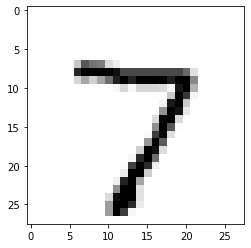

In [3]:
all_values = datalist.split(',')
image_values = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_values, cmap='Greys',interpolation="None")

In [4]:
scaled_input = (numpy.asfarray(all_values[1:])/255.0 *0.99)+0.01
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [5]:
# nearal network class definition: init; train; query.
class neuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # 含input-hidden-output的3层神经网络，学习率learningrate
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        self.lr = learningrate 
        
        # weight inside the arrays are w_i_j, where link is from node i to node j in the next layer. 
        '''# easy but popular method to Initialize：
        self.wih = (numpy.random.rand(self.hnodes, self.inodes)-0.5)
        self.who = (numpy.random.rand(self.onodes, self.hnodes)-0.5)
        '''
        #正态分布的方式实现初始权重：
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        # activation function is the sigmoid function 激活函数
        self.activation_function = lambda x: scipy.special.expit(x)
        
    
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array 
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        #calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        #calculate the signals emering from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # error = (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors*final_outputs*(1.0-final_outputs)), numpy.transpose(hidden_outputs))
        # update the weights for the links between the inputs and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)), numpy.transpose(inputs))
        
    
    def query(self, inputs_list):
        # convert inputs list to 2d array 
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        #calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        #c alculate the signals emering from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    

In [6]:
#output nodes is 10 (example)
onodes = 10
targets = numpy.zeros(onodes)+0.01
targets[int(all_values[0])] = 0.99
targets

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01])